## Determine who in the training set plays powerplay

In [6]:
import pandas as pd
import seaborn as sns

In [2]:
skater_2021 = pd.read_csv('../data/stats/past_seasons/skaters_2021.csv')
skater_2022 = pd.read_csv('../data/stats/past_seasons/skaters_2022.csv')

In [3]:
skater_2021.columns

Index(['player_id', 'player_name', 'age', 'season', 'game_num', 'date', 'team',
       'opponent', 'home_away_status', 'result', 'G', 'A', 'P', 'rating',
       'PIM', 'EVG', 'PPG', 'SHG', 'GWG', 'EVA', 'PPA', 'SHA', 'S', 'S_perc',
       'shifts', 'TOI', 'HIT', 'BLK', 'FOW', 'FOL', 'FOW_perc'],
      dtype='object')

In [4]:
skater_2021 = skater_2021.loc[:, ['player_id', 'player_name', 'season', 'PPG', 'PPA', 'TOI']]
skater_2021['PPP'] = skater_2021['PPG'] + skater_2021['PPA']
skater_agg_2021 = skater_2021.groupby(['player_name', 'season'])[['PPP', 'TOI']].sum().reset_index()

skater_2022 = skater_2022.loc[:, ['player_id', 'player_name', 'season', 'PPG', 'PPA', 'TOI']]
skater_2022['PPP'] = skater_2022['PPG'] + skater_2022['PPA']
skater_agg_2022 = skater_2022.groupby(['player_name', 'season'])[['PPP', 'TOI']].sum().reset_index()

skater_agg = pd.concat([skater_agg_2021, skater_agg_2022], axis = 0)

skater_agg['PPP_60'] = 60 * skater_agg['PPP'] / skater_agg['TOI']

In [5]:
skater_agg.sort_values('PPP_60', ascending = False)

,player_name,season,PPP,TOI,PPP_60
64,Andrew Poturalski,2022,2,20.283333,5.916187
965,Vladimir Tkachev,2022,2,55.933333,2.145411
372,Jack Quinn,2022,1,29.750000,2.016807
724,Nikita Kucherov,2022,30,939.200000,1.916525
35,Alexander Radulov,2021,6,195.683333,1.839707
...,...,...,...,...,...
256,Derek Forbort,2022,0,1376.233333,0.000000
258,Derek Ryan,2022,0,857.316667,0.000000
259,Derek Stepan,2022,0,626.150000,0.000000
506,Leo Komarov,2021,0,423.466667,0.000000


<Axes: xlabel='PPP_60', ylabel='Count'>

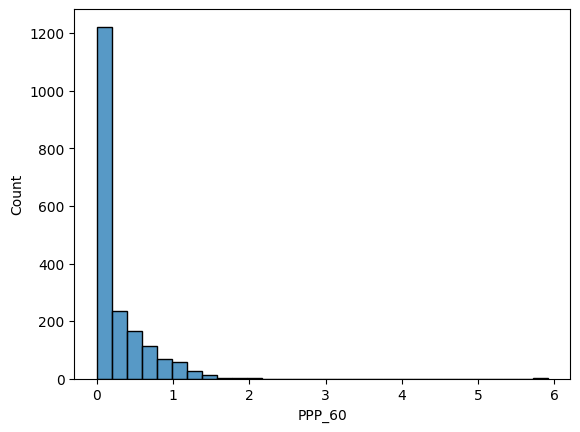

In [7]:
sns.histplot(data = skater_agg, x = 'PPP_60', bins = 30)

(0.0, 2.5)

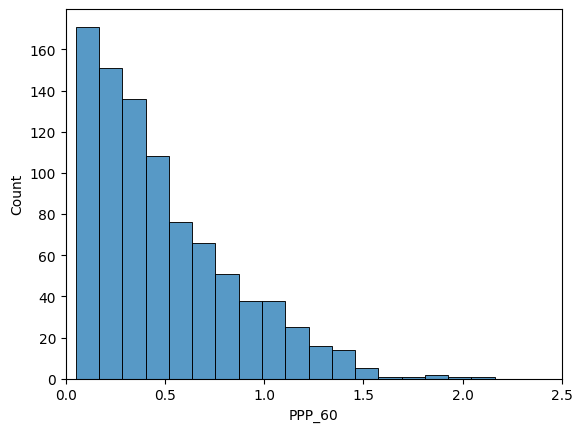

In [12]:
skater_agg_more  = skater_agg[skater_agg['PPP_60'] > 0.05]
plot = sns.histplot(data = skater_agg_more, x = 'PPP_60', bins = 50)
plot.set_xlim(0, 2.5)

In [13]:
pd.set_option('display.max_rows', None)
display(skater_agg_more.loc[(skater_agg_more['PPP_60'] >= 0.10) & (skater_agg_more['PPP_60'] <= 1.0), ['player_name', 'PPP_60']].sort_values('PPP_60', ascending=False))
pd.set_option('display.max_rows', 10)

,player_name,PPP_60
819,Roope Hintz,0.998002
680,Mitch Marner,0.997628
476,Kevin Fiala,0.994102
443,Joe Pavelski,0.990186
368,Jared McCann,0.988631
465,Johnny Gaudreau,0.984812
23,Alex DeBrincat,0.982332
93,Blake Wheeler,0.981426
663,Nikolaj Ehlers,0.980844
55,Andrei Svechnikov,0.980489


Here are some example cutoffs...

In [27]:
# 1 PPP over 15 games @ ~19:00 min/game
print(60 * 1 / (15 * 19))

0.21052631578947367


In [16]:
# Brent Burns 18 PPP over 82 games @ ~23:00 min/game
print(60 * 18 / (82 * 23))

0.5726405090137858


In [17]:
# Sebastian Aho 18 PPP over 56 games @ 20:00 min/game
print(60 * 18 / (56 * 20))

0.9642857142857143


In [23]:
# Tage Thompson 3 PPP over 38 games @ 19:00 min/game
print(60 * 3 / (38 * 19))

0.24930747922437674


In [24]:
# Tage Thompson 16 PPP over 78 games @ 20:00 min/game
print(60 * 16 / (78 * 20))

0.6153846153846154


It seems like somehwere around 0.35 should be the cutoff. Note that if a player that is not on the power play scores PPP, we need to make sure that 1 point in the 15 game rolling window does not accidentally consider them PP for the next game. We can see above that 1 PPP in 15 games at 19 min/game is around 0.21 PPP_60. This seems reasonably below the 0.35 threshold.